# Visualization of Data

In this file we use the data to provide visual infoprmation. We create for each experiment two plots. One consists of four subplots showing the relevant four columns for our use case (input, spinning, electrical power and thermal power) over time. The second plot shows input and electrical power in the same plot for comparison and better understanding of the transition phases.


## Preliminaries

### Import libraries

In [1]:
import Global_Functions as gf
import pandas as pd
import matplotlib.pyplot as plt

### Specify folders

In [2]:
OPEN_FOLDER = "../Data/Downsampled_Data/0.05/"

In [3]:
image_folder = "../Images/Visualization_Data/"
#image_folder = image_folder + "Downsampled/0.05"

gf.check_folder(image_folder)

Folder already exists.
Folder already exists.
Creation of directory ../Images/Visualization_Data/Downsampled_005/ successful.


## Plot experiments

In [4]:
def plot_experiment(name, start = None, end = None):
    exp = gf.open_CSV_file(name + '_short.csv', OPEN_FOLDER)
    spin_head = exp.filter(regex = ("spinning_.*"))[start:end]
    
    
    # first figure consisting of the four subplots
    fig, axs = plt.subplots(2,2, sharex = True, gridspec_kw={'wspace':0.5}, figsize = (15,10))
    
    axs[1,1].plot(exp['time'][start:end], exp['th_power'][start:end], color = gf.get_color('green'), label = 'th_power')
    axs[1,1].set_ylabel('th_power', color = gf.get_color('green'))
    axs[1,1].set_ylim([3000, 21000])
    
    axs[1,0].plot(exp['time'][start:end], exp['el_power'][start:end], color = gf.get_color('grey'), label = 'el_power')
    axs[1,0].set_ylabel('el_power', color = gf.get_color('grey'))
    axs[1,0].set_ylim([0,4000])
    
    axs[0,0].plot(exp['time'][start:end], exp['input_voltage'][start:end], color = gf.get_color('blue'), label = 'input_voltage')
    axs[0,0].set_ylabel('voltage', color = gf.get_color('blue'))
    axs[0,0].set_ylim([-0.5, 10.5])
    
    axs[0,1].plot(exp['time'][start:end], spin_head, color = gf.get_color('orange'), label = 'spinning')
    axs[0,1].set_ylabel('spinning', color = gf.get_color('orange'))
    axs[0,1].set_ylim([2900,4000])

    plt.xlabel('Time')
    fig.legend()
    fig.suptitle('Visualization of ' + name, fontsize = 25)
    plt.show()
    fig.savefig(image_folder + name + ".png")
    fig.savefig(image_folder + name + ".svg")
    
    
    
    # second figure showing input and electric power in the same plot
    fig2, ax1 = plt.subplots(figsize = (10,8))
    line1, = ax1.plot(exp['time'][start:end], exp['el_power'][start:end], color = gf.get_color('grey'), label = 'el_power')
    ax1.set_ylabel('electric power (W)', color = gf.get_color('grey'), fontsize = 18)
    ax1.tick_params(axis='y', labelcolor= gf.get_color('grey'))
    ax1.set_ylim([0,3550])
    ax1.set_xlabel('Time (s)', fontsize = 18)
    
    ax2 = ax1.twinx()
    line2, = ax2.plot(exp['time'][start:end], exp['input_voltage'][start:end], color = gf.get_color('blue'), label = 'input_voltage')
    ax2.set_ylabel('voltage (V)', color = gf.get_color('blue'), fontsize = 18)
    ax2.tick_params(axis='y', labelcolor= gf.get_color('blue'))
    ax2.set_ylim([-0.5, 10.5])
    ax2.legend([line1, line2], ['el. power', 'voltage'], loc = 'upper right')
    ax1.set_title(name, fontsize = 25)
    fig2.tight_layout()
    fig2.savefig(image_folder + name + '_input.png')
    fig2.savefig(image_folder + name + '_input.svg')

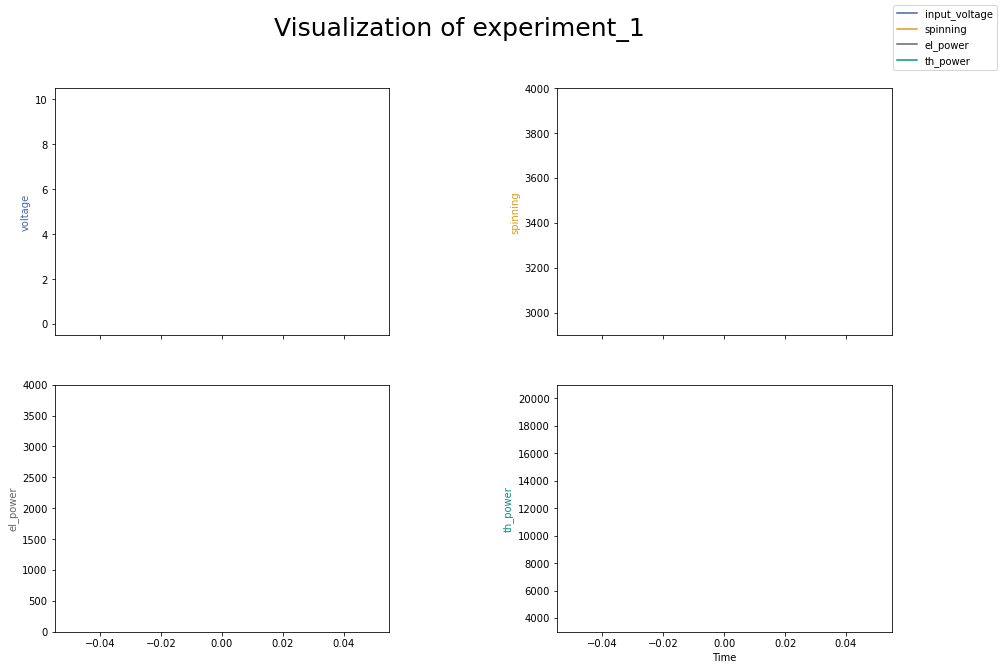

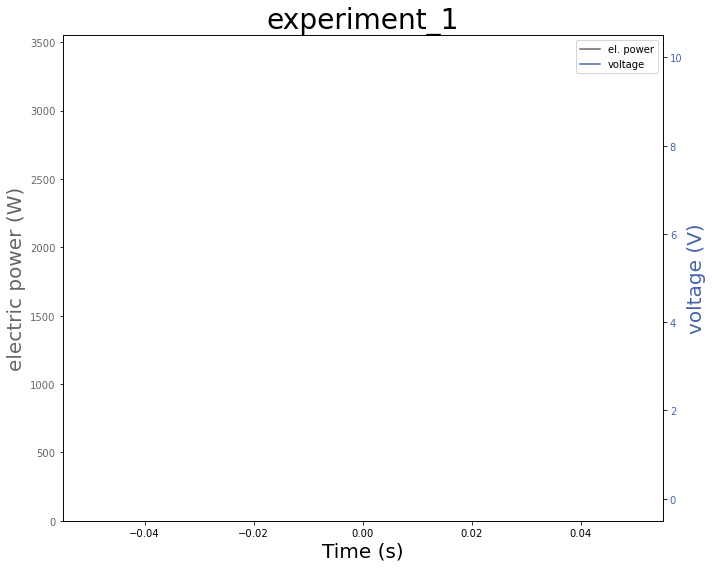

In [5]:
plot_experiment("experiment_1")

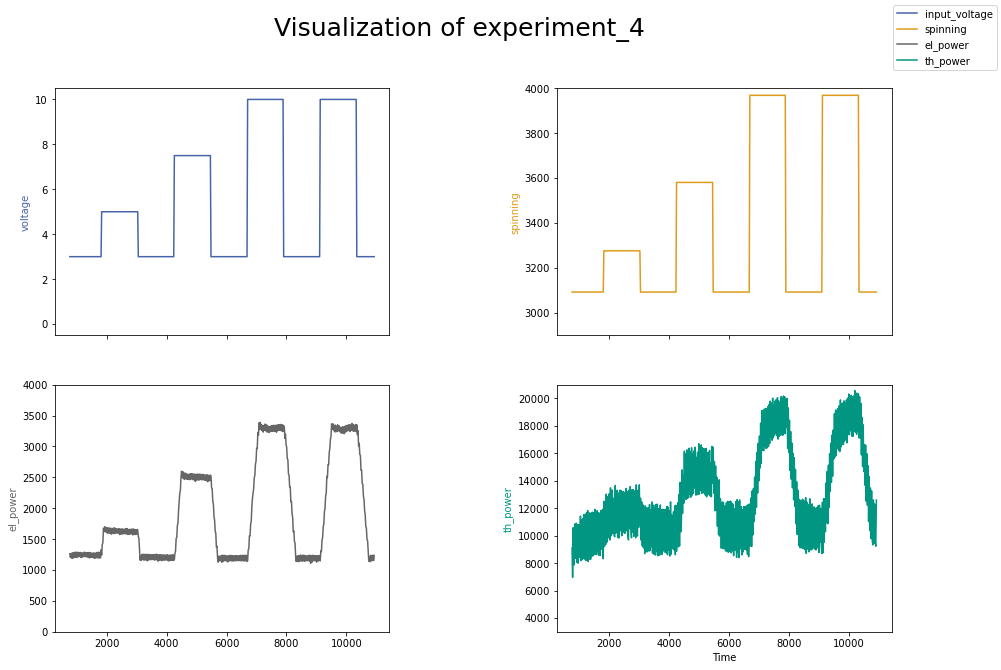

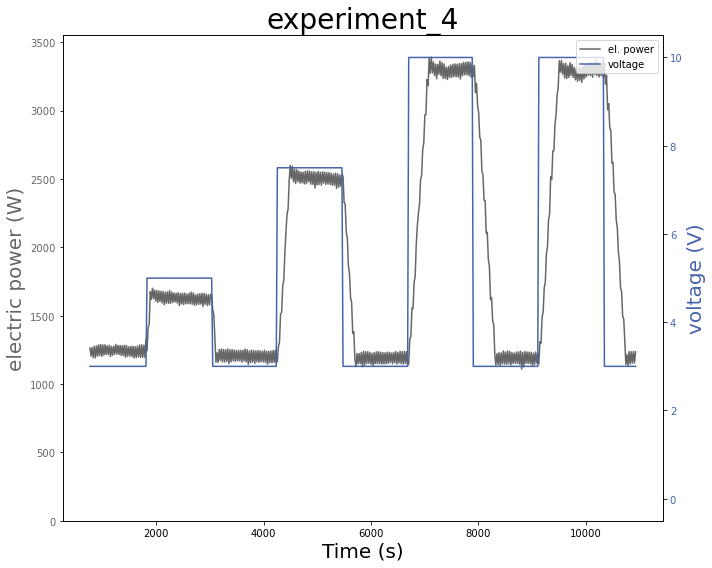

In [6]:
plot_experiment("experiment_4")

In [7]:
plot_experiment("experiment_9")

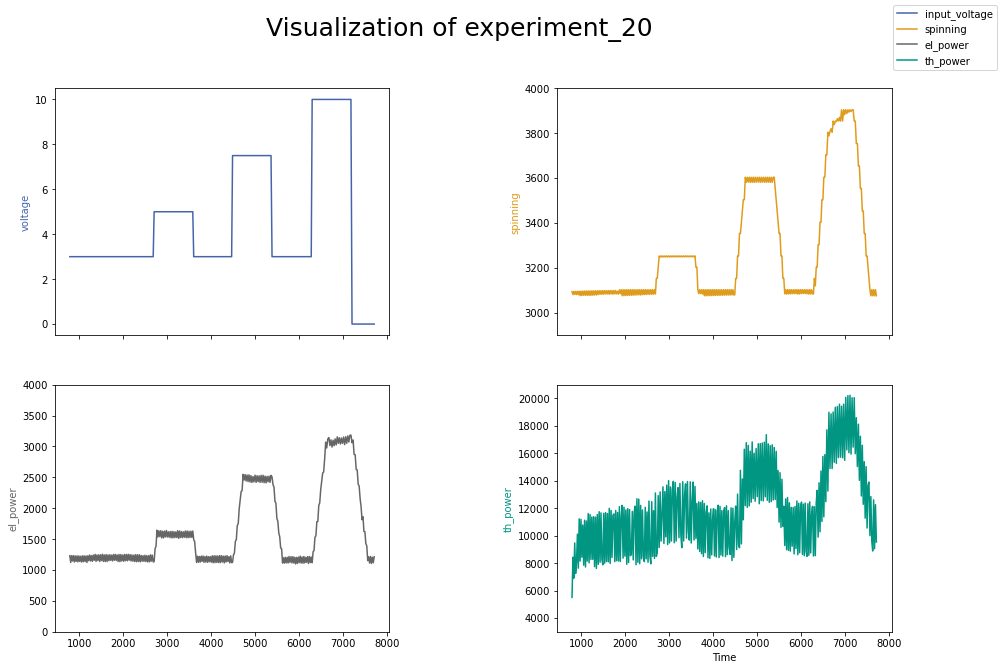

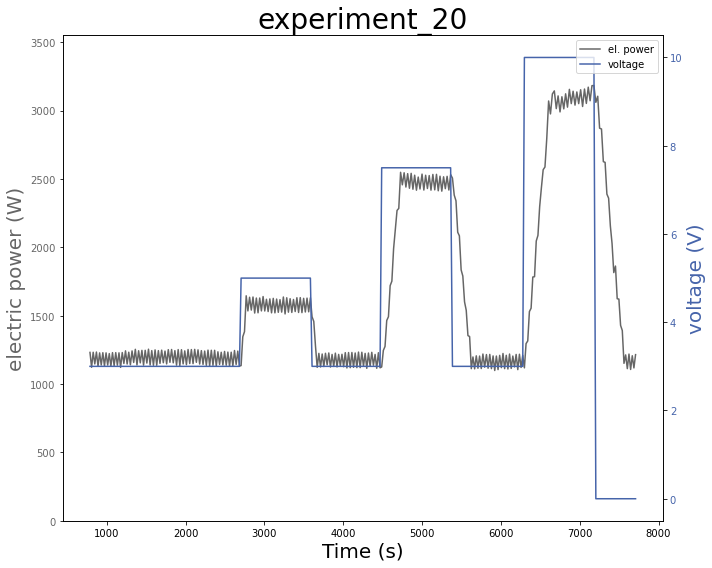

In [8]:
plot_experiment("experiment_20")

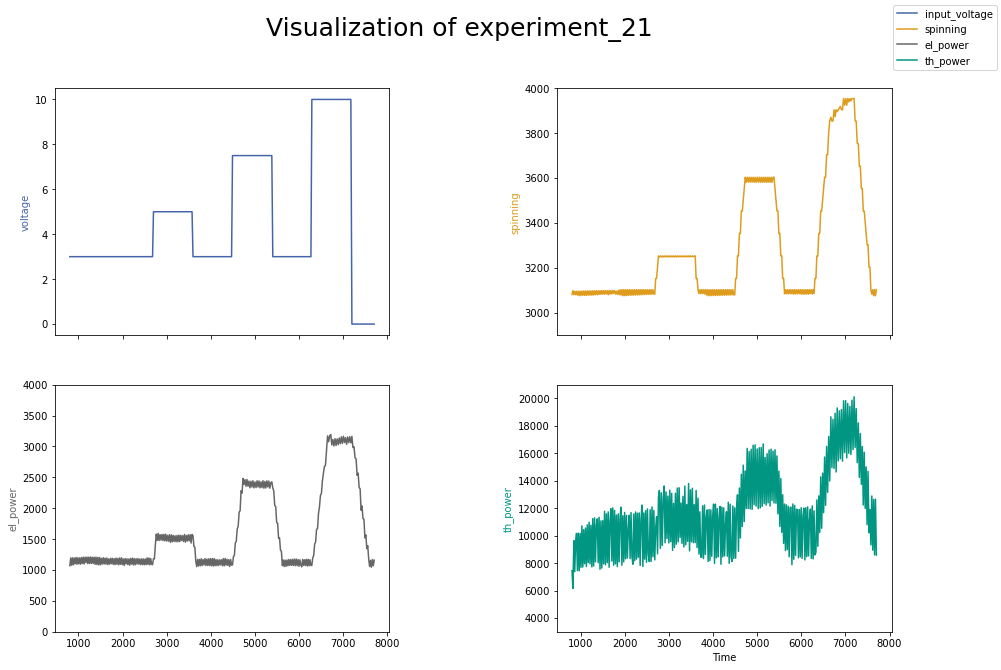

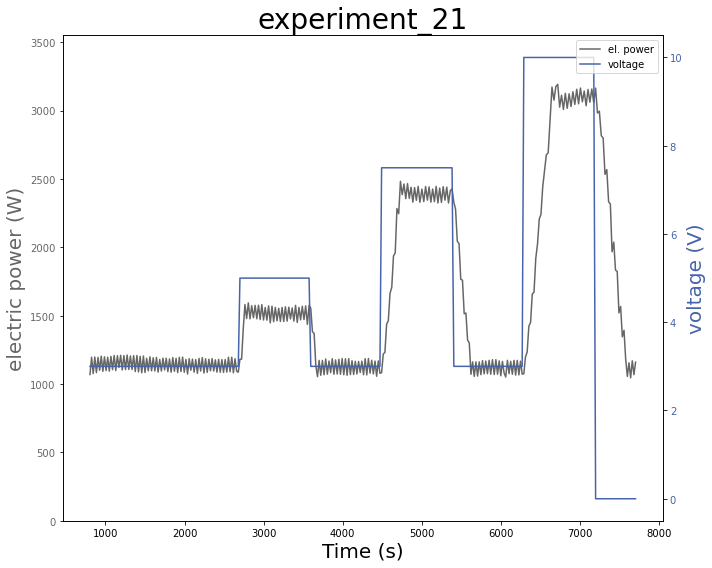

In [9]:
plot_experiment("experiment_21")

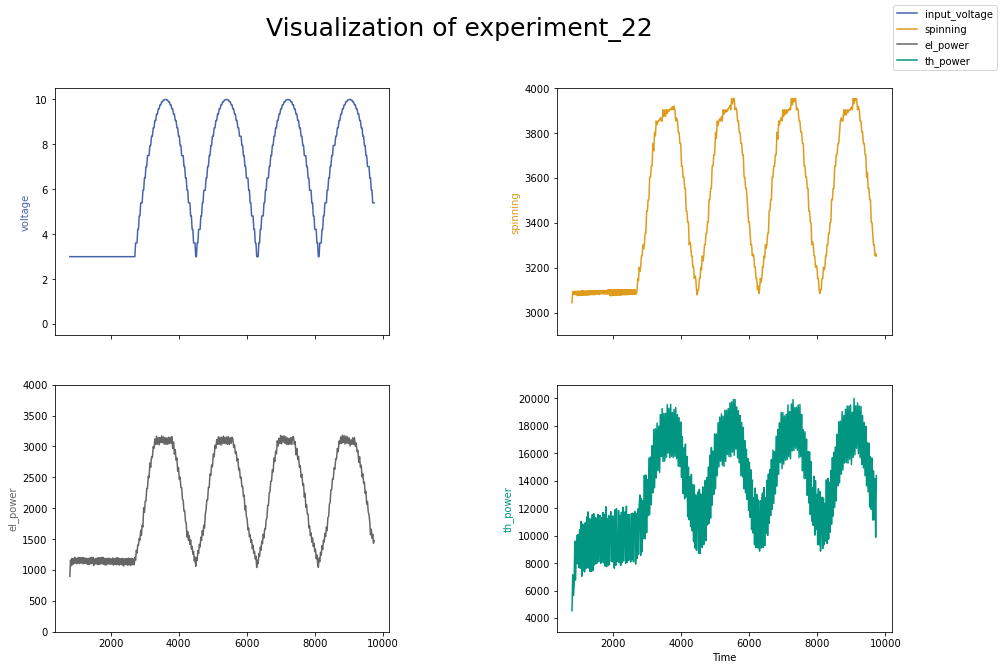

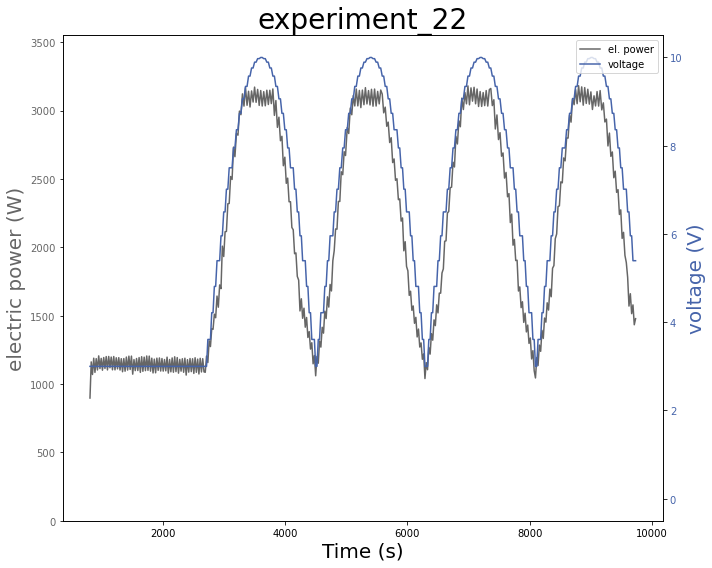

In [10]:
plot_experiment("experiment_22")

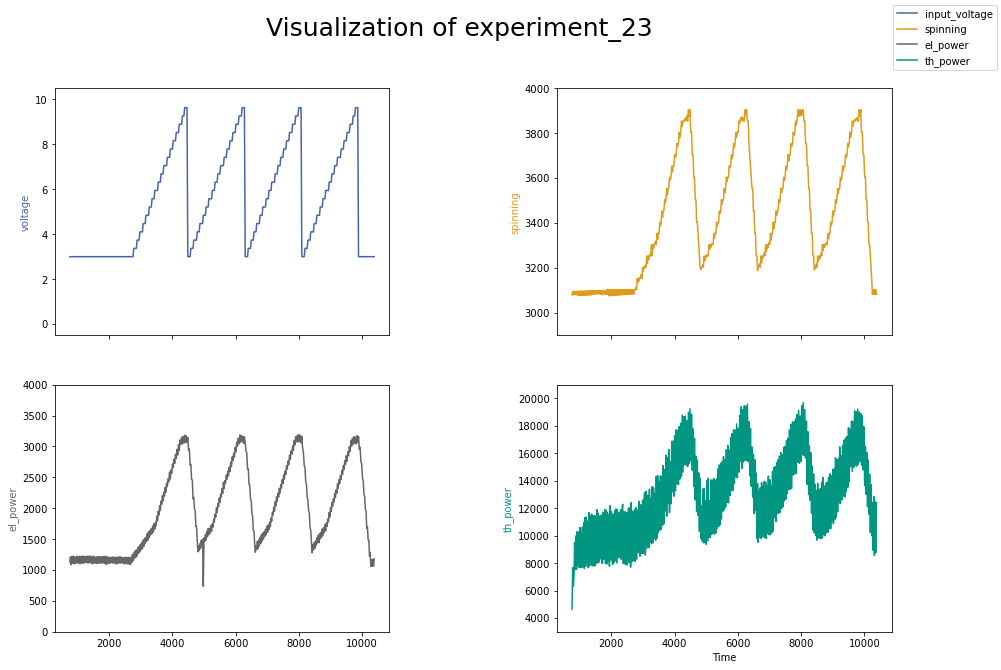

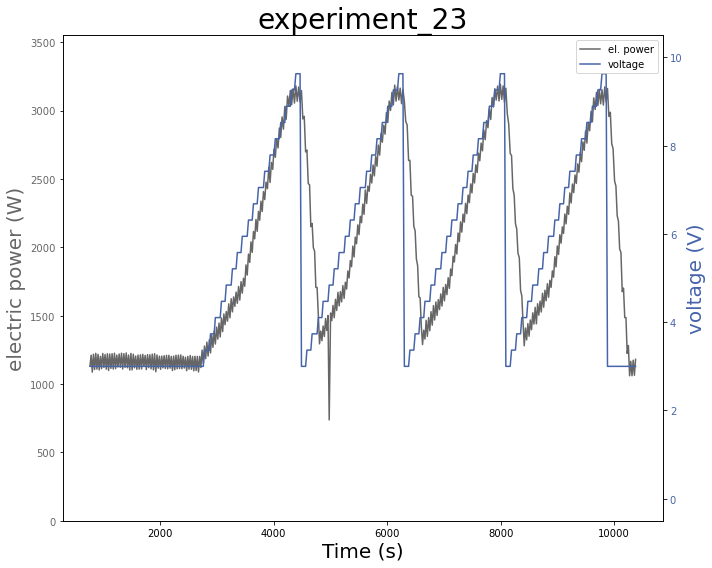

In [11]:
plot_experiment("experiment_23")

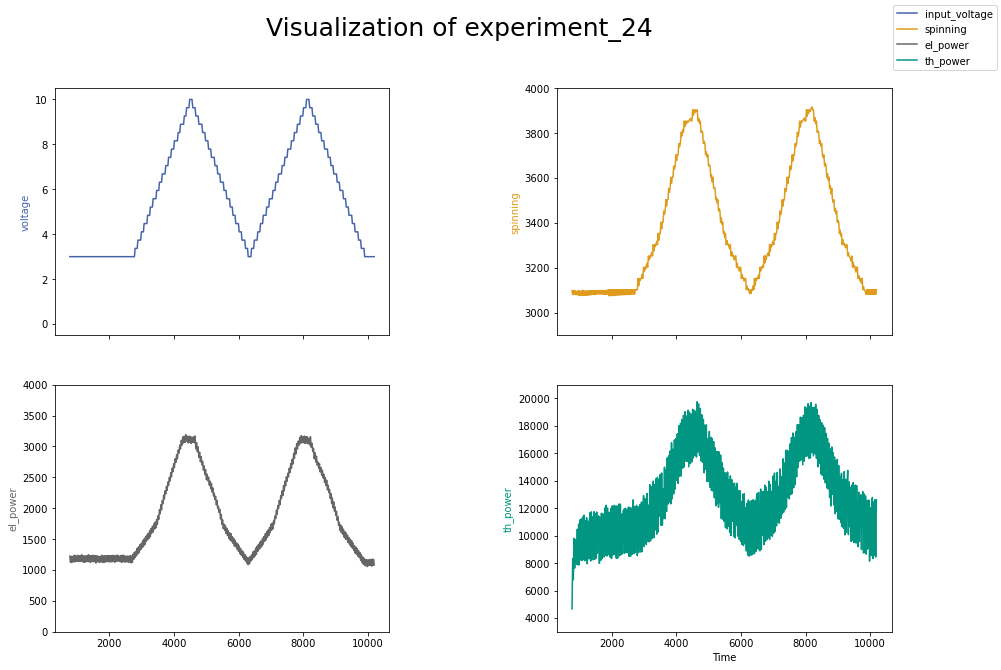

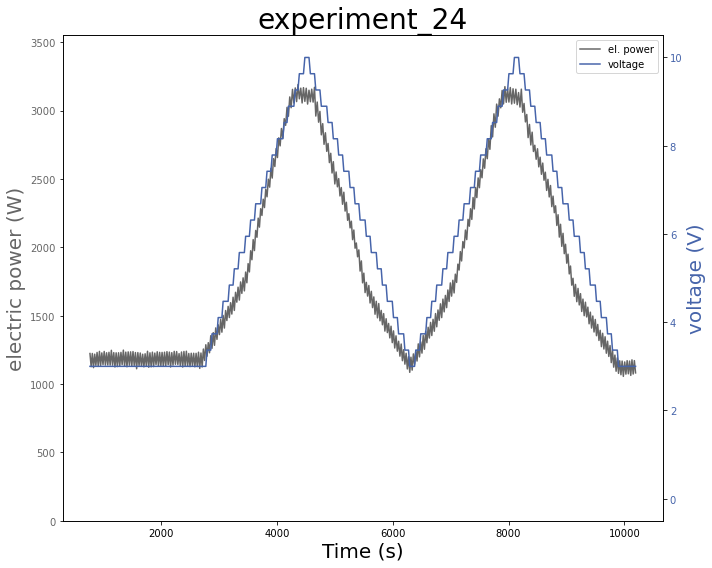

In [12]:
plot_experiment("experiment_24")